In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def list_str2float(x):
    return list(map(float, x.replace('[','').replace(']','').split(',')))

def accepted_h0(pvals, alpha):
    return np.mean(np.array(list_str2float(pvals)) > alpha)

## Mean Power

In [3]:
def mean_power(dim, n, norm, alpha=0.05):
    df = pd.read_csv(f'../results/dim={dim}_n={n}_norm={norm}_method=approximate.csv')
    dists = df.true_dist.unique()
    powers = []
    signifs = []
    
    for dist_true in dists:
        for dist_alter in dists:
            df_filtred = df[(df['true_dist'] == dist_true) & (df['alter_dist'] == dist_alter)]
            power = 1 - accepted_h0(df_filtred.pvals.values[0], alpha)
            if dist_true == dist_alter:
                signifs.append(power)
            else:
                powers.append(power)
    return np.mean(powers), np.mean(signifs)

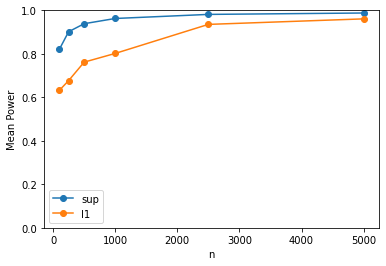

In [13]:
ns = [100, 250, 500, 1000, 2500, 5000]
dim=3
norms=['sup', 'l1']
plt.rcParams['figure.figsize'] = [6, 4]
for norm in norms:
    results = []
    for n in ns:
        power, signif = mean_power(dim=dim, n=n, norm=norm, alpha=0.05)
        results.append([n, power, signif])
    results = np.array(results)
    plt.plot(results[:, 0], results[:, 1], 'o-', label=norm)

plt.xlabel('n')
plt.ylabel('Mean Power')
plt.ylim((0,1))
plt.legend()

## Power as heat maps

In [57]:
def plot_power_matrix(df, test_label):
    dists = df.true_dist.unique()
    n_dist = len(dists)
    values = np.zeros((n_dist, n_dist))
    avg_power = []
    signif = []
    for id_td, td in enumerate(dists):
        for id_ad, ad in enumerate(dists):
            df_filtred = df[(df['true_dist'] == td) & (df['alter_dist'] == ad)]
            try:
                values[id_td, id_ad] = 1 - accepted_h0(df_filtred.pvals.values[0], alpha)
            except:
                values[id_td, id_ad] = np.nan
            if td != ad:
                avg_power.append(values[id_td, id_ad])
            else:
                signif.append(values[id_td, id_ad])
    avg_power = np.mean(avg_power)
    plt.rcParams['figure.figsize'] = [12, 12]
    plt.imshow(values)
    plt.xticks(ticks=range(len(dists)), labels=dists, rotation=90)
    plt.yticks(range(len(dists)), labels=dists)
    plt.xlabel('ALTER Distribution')
    plt.ylabel('TRUE Distribution')
    plt.title(f'{test_label} \n Average Power: {avg_power:.4f}')
    c = plt.colorbar()
    plt.clim(0, 1)
    print(signif)

/home/rafal/WORK/IMPAN/Distributions/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rafal/WORK/IMPAN/Distributions/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.04600000000000004]


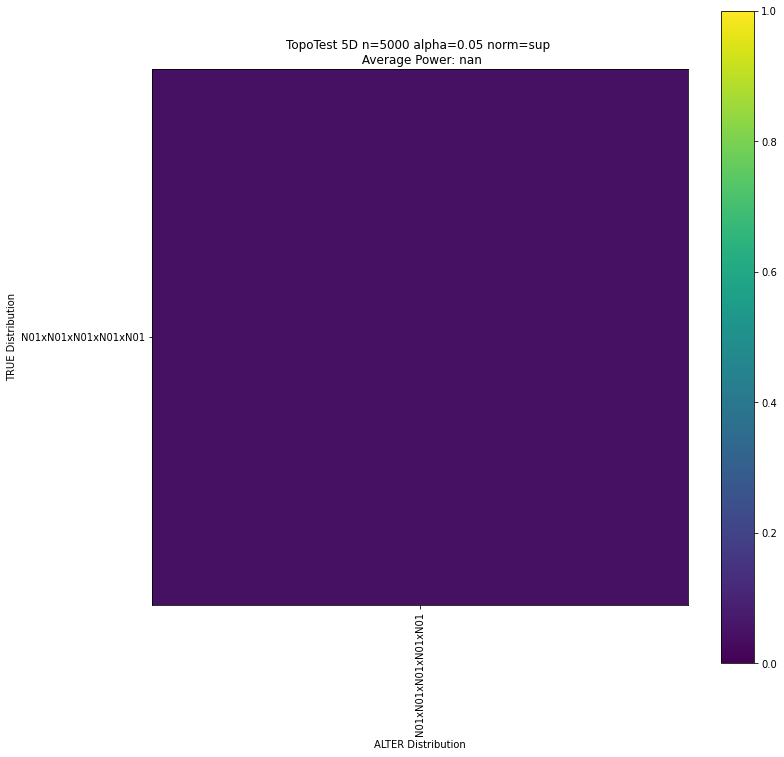

In [62]:
dim=5
n=5000
alpha=0.05
norm='sup'
df = pd.read_csv(f'../results/dim={dim}_n={n}_norm={norm}_method=approximate.csv')
plot_power_matrix(df, test_label=f'TopoTest {dim}D n={n} alpha={alpha} norm={norm}')